In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as sp
import scipy.io as sio
import statsmodels.api as sm
import math
matplotlib.rcParams[ 'figure.figsize' ] = ( 14, 6 )

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [3]:
# Load the file with all data
data=pd.read_csv('Stock data (1990-2015).csv')
data.head()

,PERMNO,date,TICKER,NAICS,PERMCO,PRC,VOL,SHROUT,CFACPR,CFACSHR
0,10001,19900102,GFGC,NaN,7953,10.1250,1900.0,1022.0,3.0,3.0
1,10001,19900103,GFGC,NaN,7953,10.0000,1300.0,1022.0,3.0,3.0
2,10001,19900104,GFGC,NaN,7953,10.0000,1300.0,1022.0,3.0,3.0
3,10001,19900105,GFGC,NaN,7953,-10.0625,0.0,1022.0,3.0,3.0
4,10001,19900108,GFGC,NaN,7953,10.1250,900.0,1022.0,3.0,3.0


In [4]:
# Caluculate the adjusted price and adjusted shares volume
data['adjprice']=data['PRC']/data['CFACPR']
data['adjshare']=data['SHROUT']*data['CFACSHR']
data.head()

,PERMNO,date,TICKER,NAICS,PERMCO,PRC,VOL,SHROUT,CFACPR,CFACSHR,adjprice,adjshare
0,10001,19900102,GFGC,NaN,7953,10.1250,1900.0,1022.0,3.0,3.0,3.375000,3066.0
1,10001,19900103,GFGC,NaN,7953,10.0000,1300.0,1022.0,3.0,3.0,3.333333,3066.0
2,10001,19900104,GFGC,NaN,7953,10.0000,1300.0,1022.0,3.0,3.0,3.333333,3066.0
3,10001,19900105,GFGC,NaN,7953,-10.0625,0.0,1022.0,3.0,3.0,-3.354167,3066.0
4,10001,19900108,GFGC,NaN,7953,10.1250,900.0,1022.0,3.0,3.0,3.375000,3066.0


In [5]:
# Summarize the indentity code for all products 
product_code=sorted(list(set(data['PERMNO'])))
print(len(product_code))

22894


In [15]:
# Summarize the number of trading days of product
# This takes a lot of time to go through the whole dataframe
product_day=[]
a=0
for i in product_code:
    if a%100==0:
        print(a)
    product_day.append(len(data[data['PERMNO']==i]))
    a+=1
print(product_day)
len(product_day)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

22894

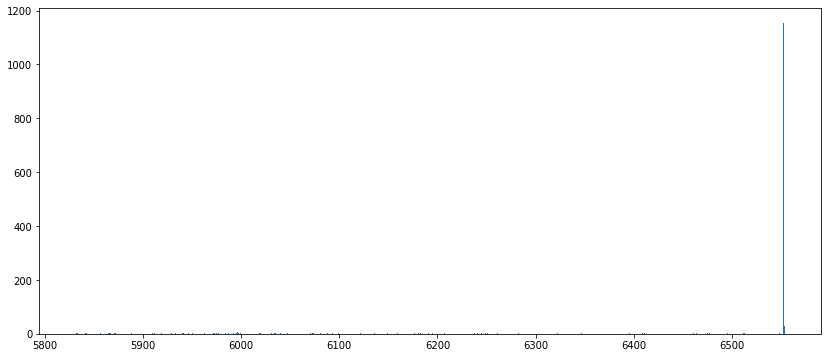

In [35]:
# Show the distribution of the trading days of all products
# Stock has the number of trading days of 6553
product_day_v,product_day_c=np.unique(product_day,return_counts=True)
plt.bar(product_day_v[5000:],product_day_c[5000:])
plt.show()
#trade_day=6553

In [17]:
# Select all stocks with 6553 trading days from all the products
# This takes a lot of time to go through the whole dataframe
stockn=[]
a=0
for i in product_code:
    if a%100==0:
        print(a)
    if len(data[data['PERMNO']==i])==6553:
        stockn.append(i)
    a+=1
print(len(stockn))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [18]:
# Save the daily prices of stocks into a two-dimensional array for speed and convenience
# For each i, close[i] corresponds to stock stockn[i]
# This takes a lot of time to go through the whole dataframe
close=np.array([np.array(data[data['PERMNO']==stockn[0]]['adjprice'])]) # Initialize the close as a two-dimensional array
a=0
for i in stockn[1:]:
    close=np.concatenate((close,np.array([data[data['PERMNO']==i]['adjprice']])),axis=0)
    if a%100==0:
        print(a)
    a+=1

0
100
200
300
400
500
600
700
800
900
1000
1100


In [19]:
# Adjust the negative value of some data errors
a=0
for i in range(len(stockn)):
    for j in range(len(close[0])):
        if close[i][j]<0:
            close[i][j]=-close[i][j]
            a+=1
print(a)

329742


In [20]:
# Exclude nan data
close_exnan=[]
stockn_exnan=[]
for i in range(len(stockn)):
    if sum(np.isnan(close[i]))>0:
        continue
    else:
        close_exnan.append(close[i])
        stockn_exnan.append(stockn[i])
print(len(close_exnan))

978


In [21]:
# Exclude inf data, this happens because for some stocks, the adjustment factors are 0
close_exinf_nan=[]
stockn_exinf_nan=[]
for i in range(len(stockn_exnan)):
    if sum(np.isinf(close_exnan[i]))>0:
        continue
    else:
        close_exinf_nan.append(close_exnan[i])
        stockn_exinf_nan.append(stockn_exnan[i])
print(len(close_exinf_nan))

978


In [22]:
# Rename the daily prices array and the stock code array for convenience
# The excluded prices will not participate in the next procedures
close=close_exinf_nan
stockn=stockn_exinf_nan
len(close)

978

In [23]:
# Extract all trading days and save them as an array all_day of integer, in the form 20101201
all_day=sorted(list(set(data[data['PERMNO']==stockn_exinf_nan[0]]['date'])))

# The strategy adjust its position at the end of each month
# Therefore, save the date of end of each month in the array all_month
# all_month is all the last trade day of all months, in the form of integer 20101201
# all_mont_index is the corresponding index for a month end in the array all_day
all_month=[]
cur=0
pre=0
for i in all_day[::-1]:
    cur=int(i/100)
    if cur!=pre:
        all_month.append(i)
    pre=int(i/100)
all_month=np.array(sorted(all_month))
all_month_index=np.array([all_day.index(i) for i in all_month])
all_day=np.array(all_day)

In [24]:
# To calculate our beta for each end of month, we have to calculate the factor of each month
# Because the factor includes a moving average of 1000 days,
# we cannot calculate the factor for the first 1000 days and thus exclude them
# beta_month is an array including all the dates when we can calculate beta
# beta_month_index is the corresponding index for element of beta_month in all_day
beta_month_index=all_month_index[all_month_index>=999]
len(beta_month_index)

# Because we run regressions between the realized rate of return between our factors,
# we need exclude the last month, which does not have a realized rate of return
# yield_month is an array including all the dates when we can run regressions
# yield_month_index is an array of index of each element of yield_month in all_day
yield_month_index=beta_month_index[:-1]
yield_month=all_day[yield_month_index]
yield_month_index

array([1012, 1033, 1052, 1075, 1094, 1115, 1137, 1157, 1180, 1201, 1222,
       1243, 1264, 1285, 1304, 1327, 1346, 1368, 1390, 1410, 1433, 1453,
       1475, 1496, 1516, 1538, 1558, 1579, 1600, 1622, 1642, 1664, 1686,
       1706, 1729, 1749, 1770, 1792, 1811, 1831, 1853, 1874, 1895, 1917,
       1938, 1959, 1982, 2001, 2023, 2043, 2062, 2084, 2105, 2125, 2147,
       2169, 2190, 2211, 2233, 2253, 2275, 2294, 2313, 2336, 2357, 2377,
       2399, 2420, 2442, 2463, 2484, 2505, 2527, 2547, 2567, 2590, 2609,
       2631, 2653, 2673, 2696, 2716, 2738, 2759, 2779, 2800, 2819, 2841,
       2861, 2883, 2904, 2925, 2948, 2963, 2986, 3007, 3027, 3048, 3067,
       3087, 3109, 3131, 3151, 3173, 3195, 3215, 3238, 3258, 3279, 3300,
       3319, 3340, 3361, 3382, 3403, 3425, 3446, 3467, 3490, 3509, 3531,
       3551, 3570, 3593, 3614, 3634, 3655, 3676, 3698, 3719, 3740, 3761,
       3783, 3803, 3822, 3844, 3865, 3886, 3908, 3928, 3951, 3972, 3993,
       4014, 4035, 4055, 4074, 4097, 4116, 4138, 41

In [25]:
# 6553 trading days and 312 trading months in total
# Among them, we can calculate beta for only 265 month ends and run regressions for only 264 month ends
print(len(all_day))
print(len(all_month))
print(len(beta_month_index))
print(len(yield_month_index))

6553
312
265
264


In [37]:
# Calculate the realized yield for all 264 month ends in the yield month
# Each element in 2-dimensional array month_yield[i][j],
# corresponds to the realized yield of stock stockn[i] at yield_month[j]
month_yield=np.zeros((len(stockn),len(yield_month_index)))
for i in range(len(stockn)):
    for j in range(len(yield_month_index)):
        month_yield[i][j]=(close[i][beta_month_index[j+1]]-close[i][beta_month_index[j]])/close[i][beta_month_index[j]]

In [38]:
yield_month

array([19931231, 19940131, 19940228, 19940331, 19940429, 19940531,
       19940630, 19940729, 19940831, 19940930, 19941031, 19941130,
       19941230, 19950131, 19950228, 19950331, 19950428, 19950531,
       19950630, 19950731, 19950831, 19950929, 19951031, 19951130,
       19951229, 19960131, 19960229, 19960329, 19960430, 19960531,
       19960628, 19960731, 19960830, 19960930, 19961031, 19961129,
       19961231, 19970131, 19970228, 19970331, 19970430, 19970530,
       19970630, 19970731, 19970829, 19970930, 19971031, 19971128,
       19971231, 19980130, 19980227, 19980331, 19980430, 19980529,
       19980630, 19980731, 19980831, 19980930, 19981030, 19981130,
       19981231, 19990129, 19990226, 19990331, 19990430, 19990528,
       19990630, 19990730, 19990831, 19990930, 19991029, 19991130,
       19991231, 20000131, 20000229, 20000331, 20000428, 20000531,
       20000630, 20000731, 20000831, 20000929, 20001031, 20001130,
       20001229, 20010131, 20010228, 20010330, 20010430, 20010

In [39]:
#here begin
# Run regressions for each end of month and save all the betas at one time, for convenience

L = [3,5,10,20,50,100,200,400,600,800,1000] # window-length for moving average
beta = np.zeros((264,len(L)+1),np.float64) # To record beta for 264 month ends
for i in range(264):
    average = pd.DataFrame(columns=L)
    average[0] = np.transpose(month_yield)[i] # Put the realized yield at the 0 column of average, y variables
    
    # Calculate the normalized moving average price for each window length, x variables
    for n in L: 
        average[n]=[j[yield_month_index[i]-n+1:yield_month_index[i]+1].mean()/j[yield_month_index[i]] for j in close]
    # Run regressions and save beta
    x = average[L]
    X = sm.add_constant(x)
    OLS = (sm.OLS(average[0],X)).fit()
    for _ in range(len(L)+1):
        beta[i][_] = OLS.params.values[_]

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [4]:
# Load market data
tf=pd.read_csv("Three-factor data (1990-2015).CSV")
tf['Mkt-RF']=tf['Mkt-RF']/100 # market return minus risk free rate
tf['SMB']=tf['SMB']/100 # SMB factor
tf['HML']=tf['HML']/100 # HML factor
mrk = pd.read_csv("Three-factor data (1990-2015).CSV")['Mkt-RF']/100
rkf = pd.read_csv("Three-factor data (1990-2015).CSV")['RF']/100 # risk free rate

In [5]:
rkf

0      0.0025
1      0.0021
2      0.0027
3      0.0027
4      0.0031
        ...  
259    0.0000
260    0.0000
261    0.0000
262    0.0000
263    0.0001
Name: RF, Length: 264, dtype: float64

In [6]:
mrk

0      0.0287
1     -0.0255
2     -0.0478
3      0.0068
4      0.0058
        ...  
259   -0.0604
260   -0.0308
261    0.0775
262    0.0056
263   -0.0217
Name: Mkt-RF, Length: 264, dtype: float64

In [161]:
# Adjust position for the next 264-io months, the first io months are used to estimate beta
# Make it a function for convenient comparison
def position(io=12,num=20,L=[3,5,10,20,50,100,200,400,600,800,1000]):
    # io is the period to estimate the beta
    # Divide all stocks into 20 groups each transaction date, based on their estimated rates of return
    
    # The position adjustment period, when a transaction happens
    trade_length=264-io 
    # A empty matrix for the strategy's yield for each trading month
    trend = np.zeros((num+1,trade_length),np.float64)  
    # The period to estimate the beta
    est_period=io 
    
    for i in range(trade_length):
        # Calculate the average for all beta and record them
        estbeta = np.mean(beta[i:i+est_period], axis=0)
        # average is a dataframe to record the current month's return, both true return and estimated return
        average = pd.DataFrame(columns= L + ["estreturn","return"])
        # The true return is just the month_yield
        # from (io-1)th yield month to the last yield month
        average["return"] = np.array([j[i+est_period] for j in month_yield])
        
        # Calculate the moving average for each window-length for each stock
        # from (io-1)th yield month to the last yield month
        for n in L:
            average[n]=np.array([j[yield_month_index[i+est_period]-n+1:yield_month_index[i+est_period]+1].mean()/j[yield_month_index[i+est_period]] for j in close])

        # Calculate estmated return, which is beta*X
        average["estreturn"]  =  estbeta[0]
        for z in range(len(L)):
            average["estreturn"] =  average["estreturn"]+ estbeta[1+z] * average[L[z]]

        # Adjust position
        unit = int(np.size(average["return"])/num) # Calculate the number of stocks in each group
        # Sort all stocks in descending order based on their estimated return
        average = average.sort_values(by="estreturn" , ascending=False) 
        
        # Record the simulated return of each group and our strategy
        # trend is a 21*trade_length matrix, each column stands for the simulated return at that month
        # Just calculate the average of all stocks, because strategy assumes equal value for each stock in our position
        for z in range(1,num+1):
            trend[z][i]=np.mean(average["return"][unit*(z-1):unit*z].values)
        # The simulated return of our strategy should be divided by 2 for our shorting of last group
        trend[0][i]=(np.mean(average["return"][0:unit].values) - np.mean(average["return"][unit*(num-1):unit*num].values))/2
    
    # Calculate the cumulative return 
    cumulative_return=np.zeros((num+1,trade_length),np.float64)
    for j in range(num+1):
        a=1
        for i in range(trade_length):
            a*=(1+trend[j][i])
            cumulative_return[j][i]=a
    
    # Calculate the cumulative market return
    mrk_return=[]
    a=1
    for i in range(est_period,trade_length+est_period):
        a*=(1+mrk.values[i]+rkf.values[i])
        mrk_return.append(a)
        
    # Calculate rate of return minus rkf
    trend_rkf=np.array([i for i in trend])
    for i in range(num+1):
        trend_rkf[i]=trend[i]-rkf.values[est_period:trade_length+est_period]
        
    return trend,trend_rkf,cumulative_return,mrk_return
trend,trend_rkf,cumulative_return,mrk_return=position(io=12,num=20,L=[3,5,10,20,50,100,200,400,600,800,1000])

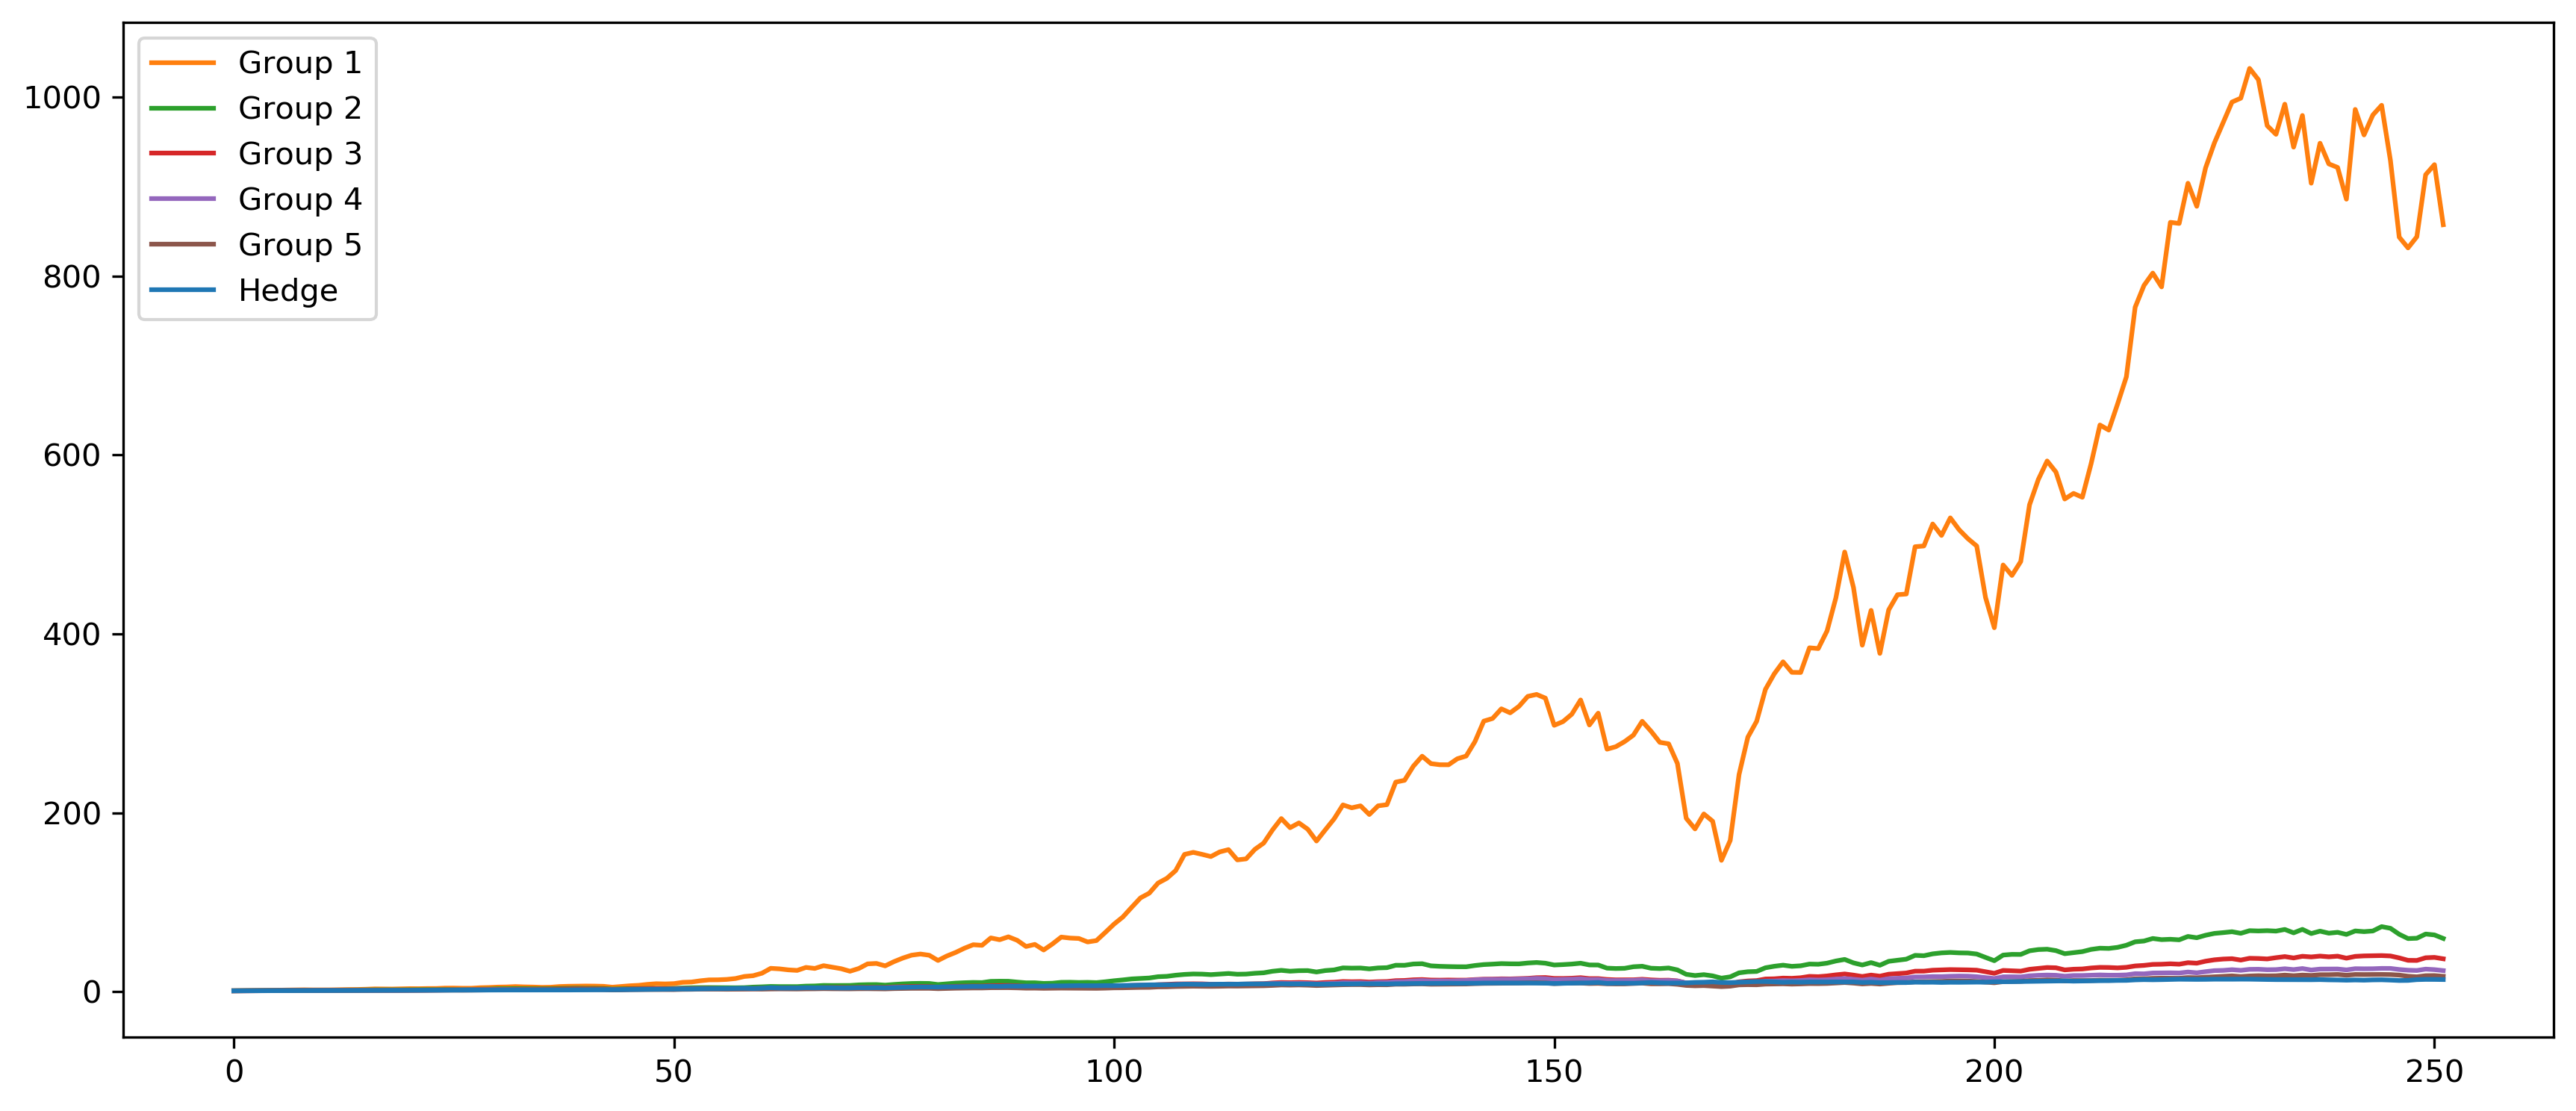

In [82]:
# Plot the cumulative return of the first 5 group and our strategy
for j in range(1,6):
    plt.plot(cumulative_return[j],color=('C'+str(j)),label=('Group '+str(j)))
plt.plot(cumulative_return[0],color=('C'+str(0)),label='Hedge')
plt.legend(loc='best')
plt.show()

Compound annual interest rate is: 13.248073174289798


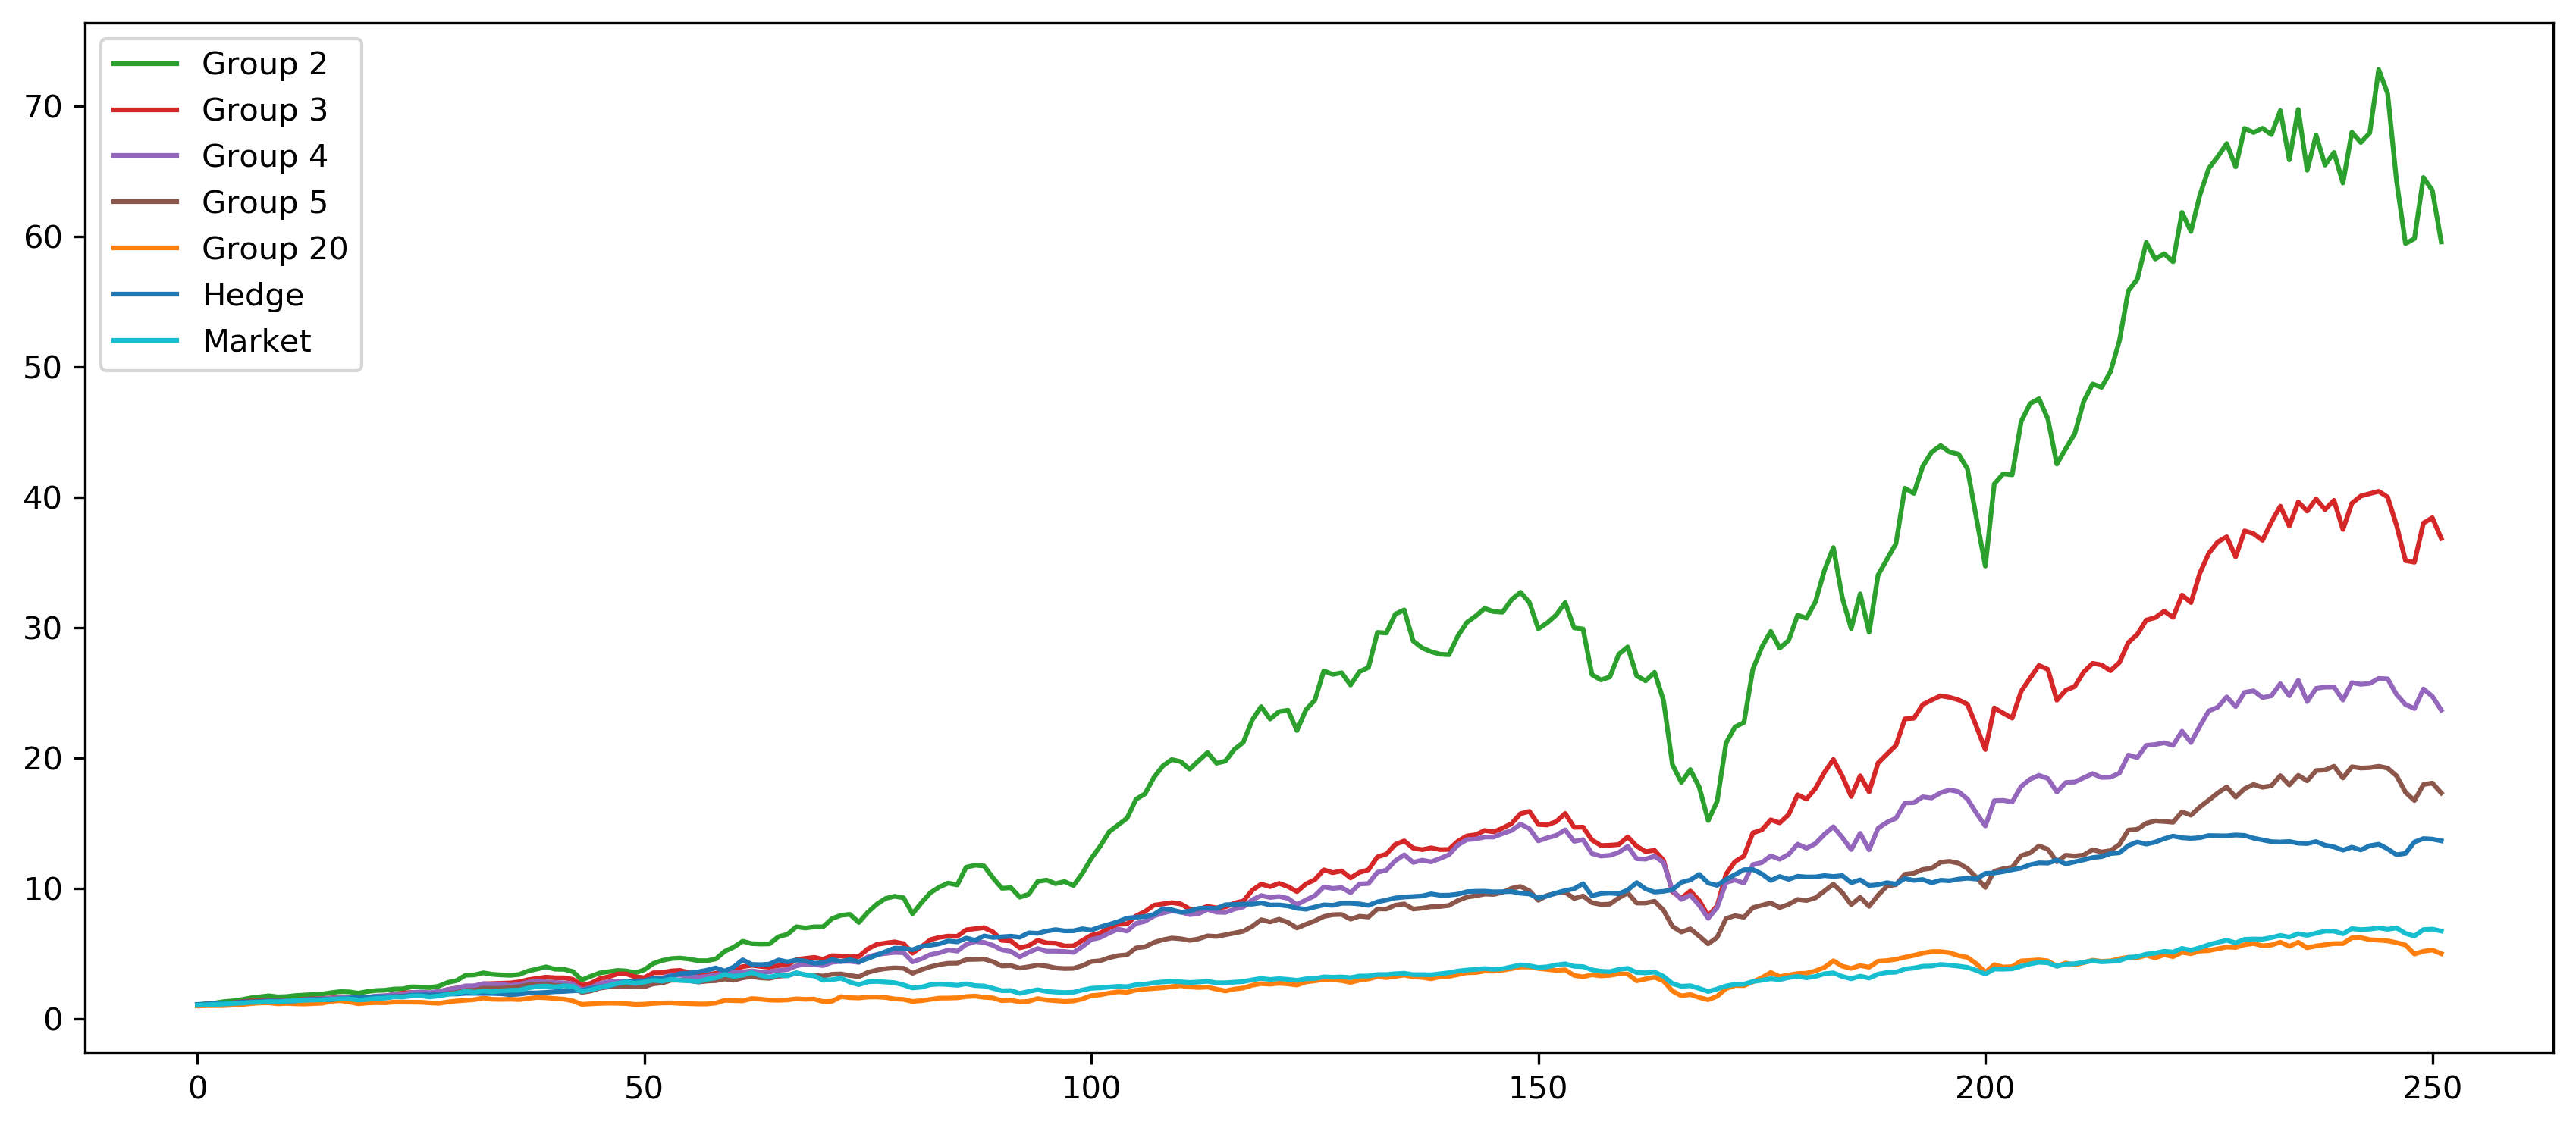

In [83]:
# Plot the cumulative return of the group 2-5, group 20 and our strategy
print('Compound annual interest rate is:',100*(cumulative_return[0][-1]**(1/252*12)-1))
for j in range(2,6):
    plt.plot(cumulative_return[j],color=('C'+str(j)),label=('Group '+str(j)))
plt.plot(cumulative_return[-1],color=('C'+str(1)),label=('Group '+str(20)))
plt.plot(cumulative_return[0],color=('C'+str(0)),label='Hedge')
plt.plot(mrk_return,label='Market',color='C9')
plt.legend(loc='best')
plt.show()

In [76]:
# Maximum drawback
xs=cumulative_return[0]
i = np.argmax(np.maximum.accumulate(xs) - xs) # end of the period
j = np.argmax(xs[:i]) # start of period
print(j,i)
print((cumulative_return[0][228]-cumulative_return[0][246])/cumulative_return[0][228])

228 246
0.10788702887602988


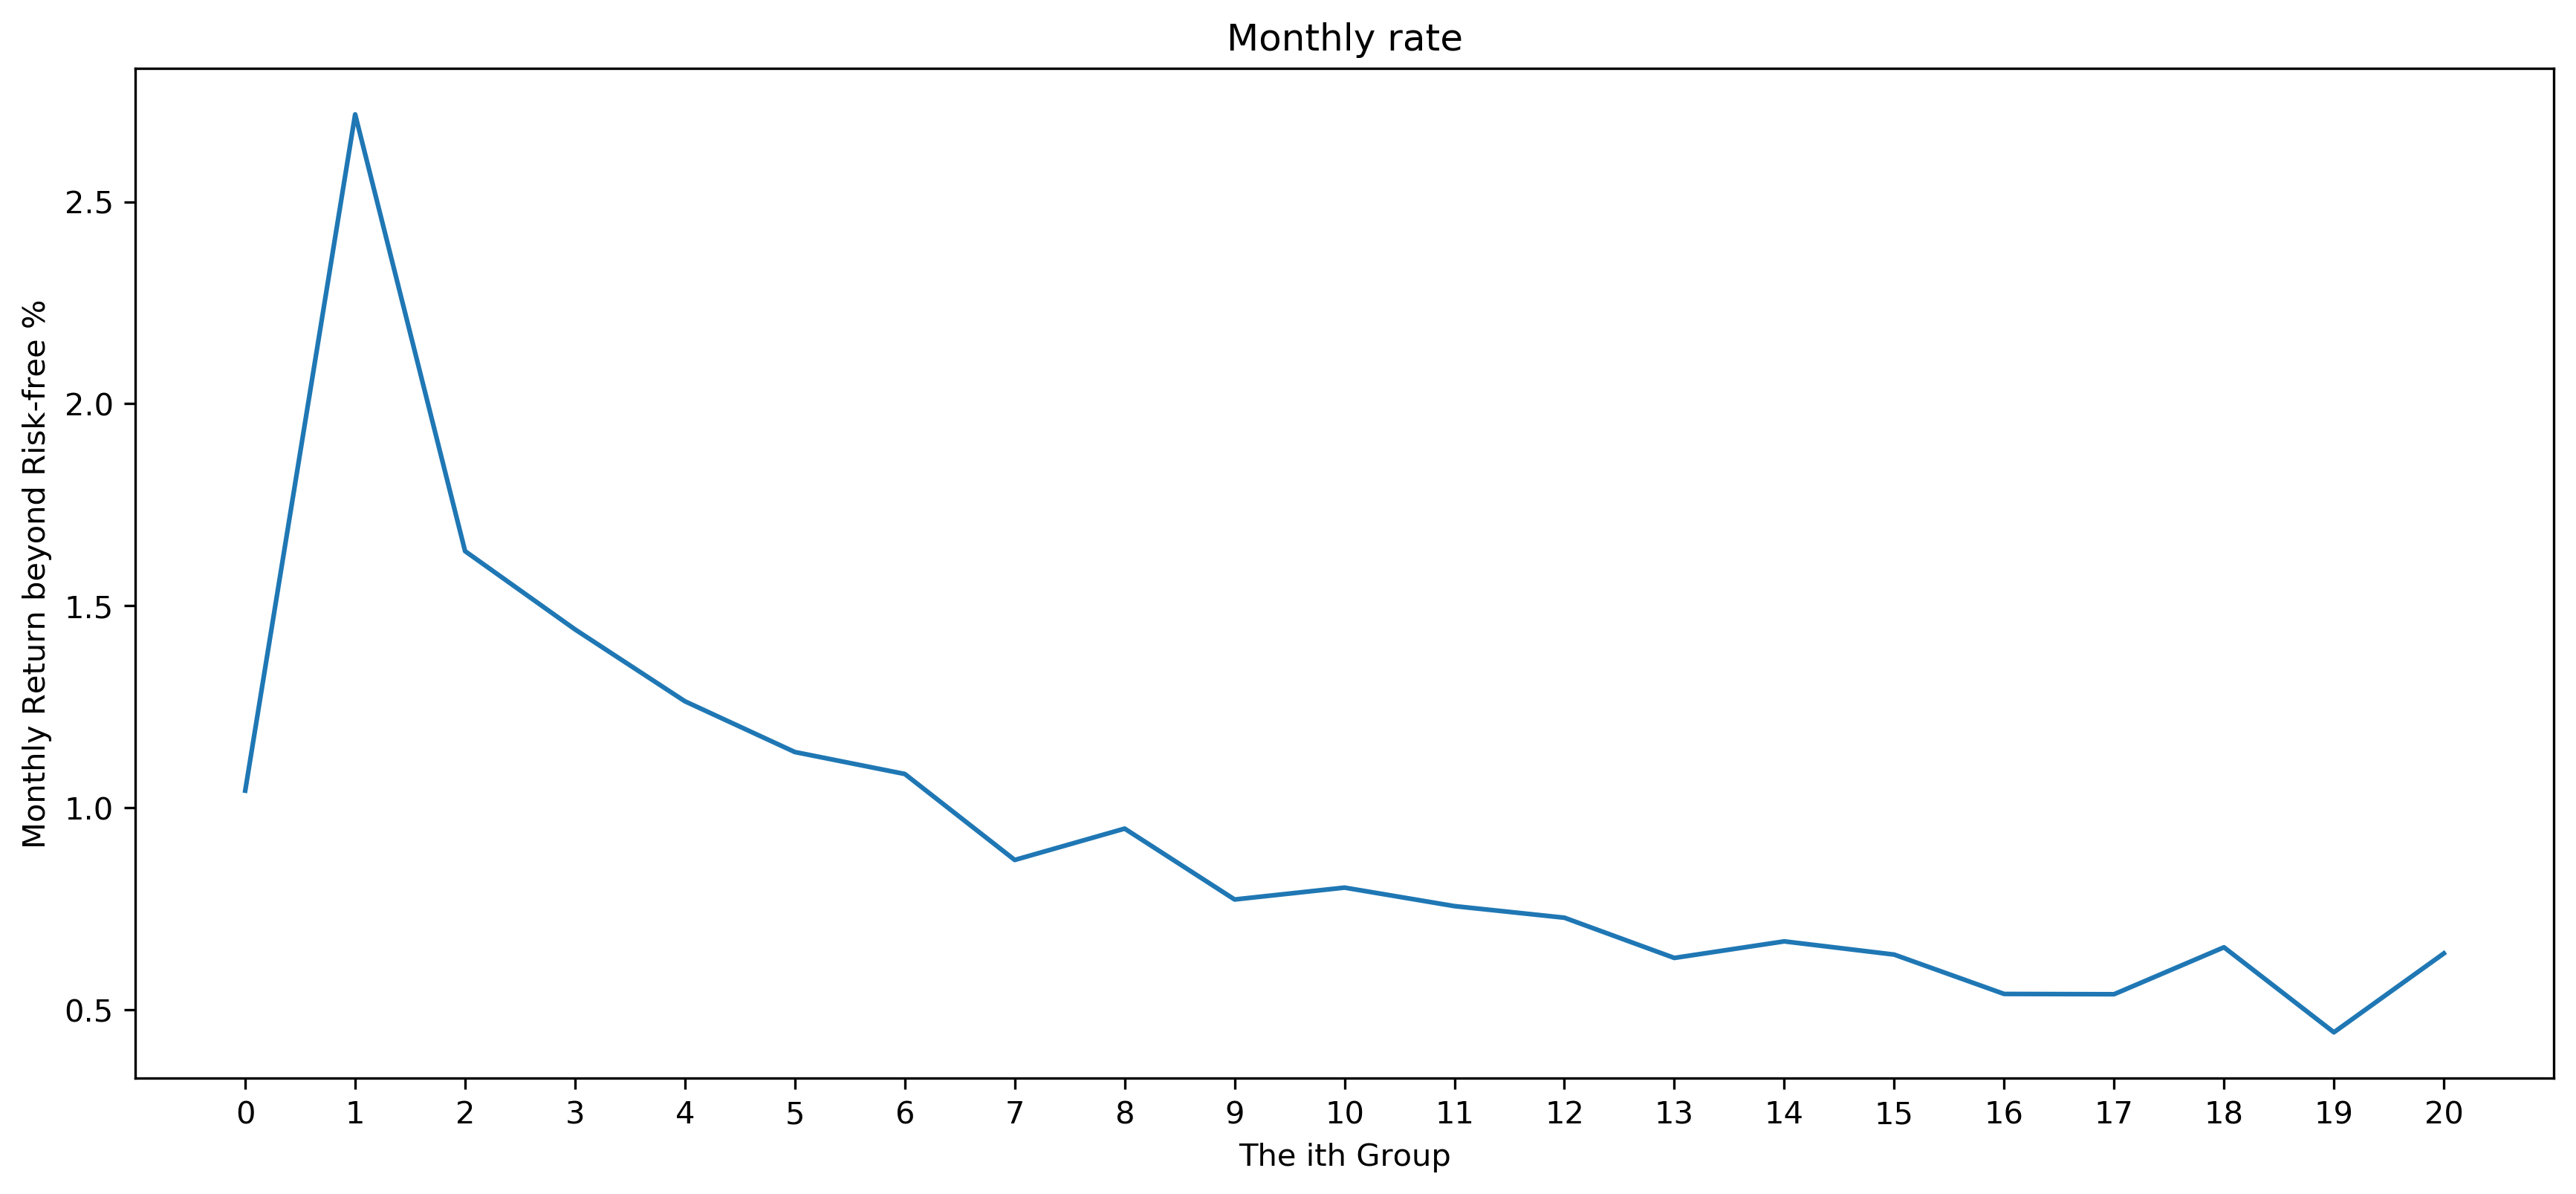

In [85]:
plt.plot(range(21),(np.array([cumulative_return[i][-1]**(1/252) for i in range(len(cumulative_return))])-1)*100)
plt.xticks(range(21))
plt.xlabel('The ith Group')
plt.ylabel('Monthly Return beyond Risk-free %')
plt.title('Monthly rate')
plt.show()

In [86]:
# Make the x label
scr=[0]*252
for i in range(12,264):
    if int((yield_month[i]%10000)/100)==1:
        scr[i-12]=str(yield_month[i])
    else:
        scr[i-12]=''

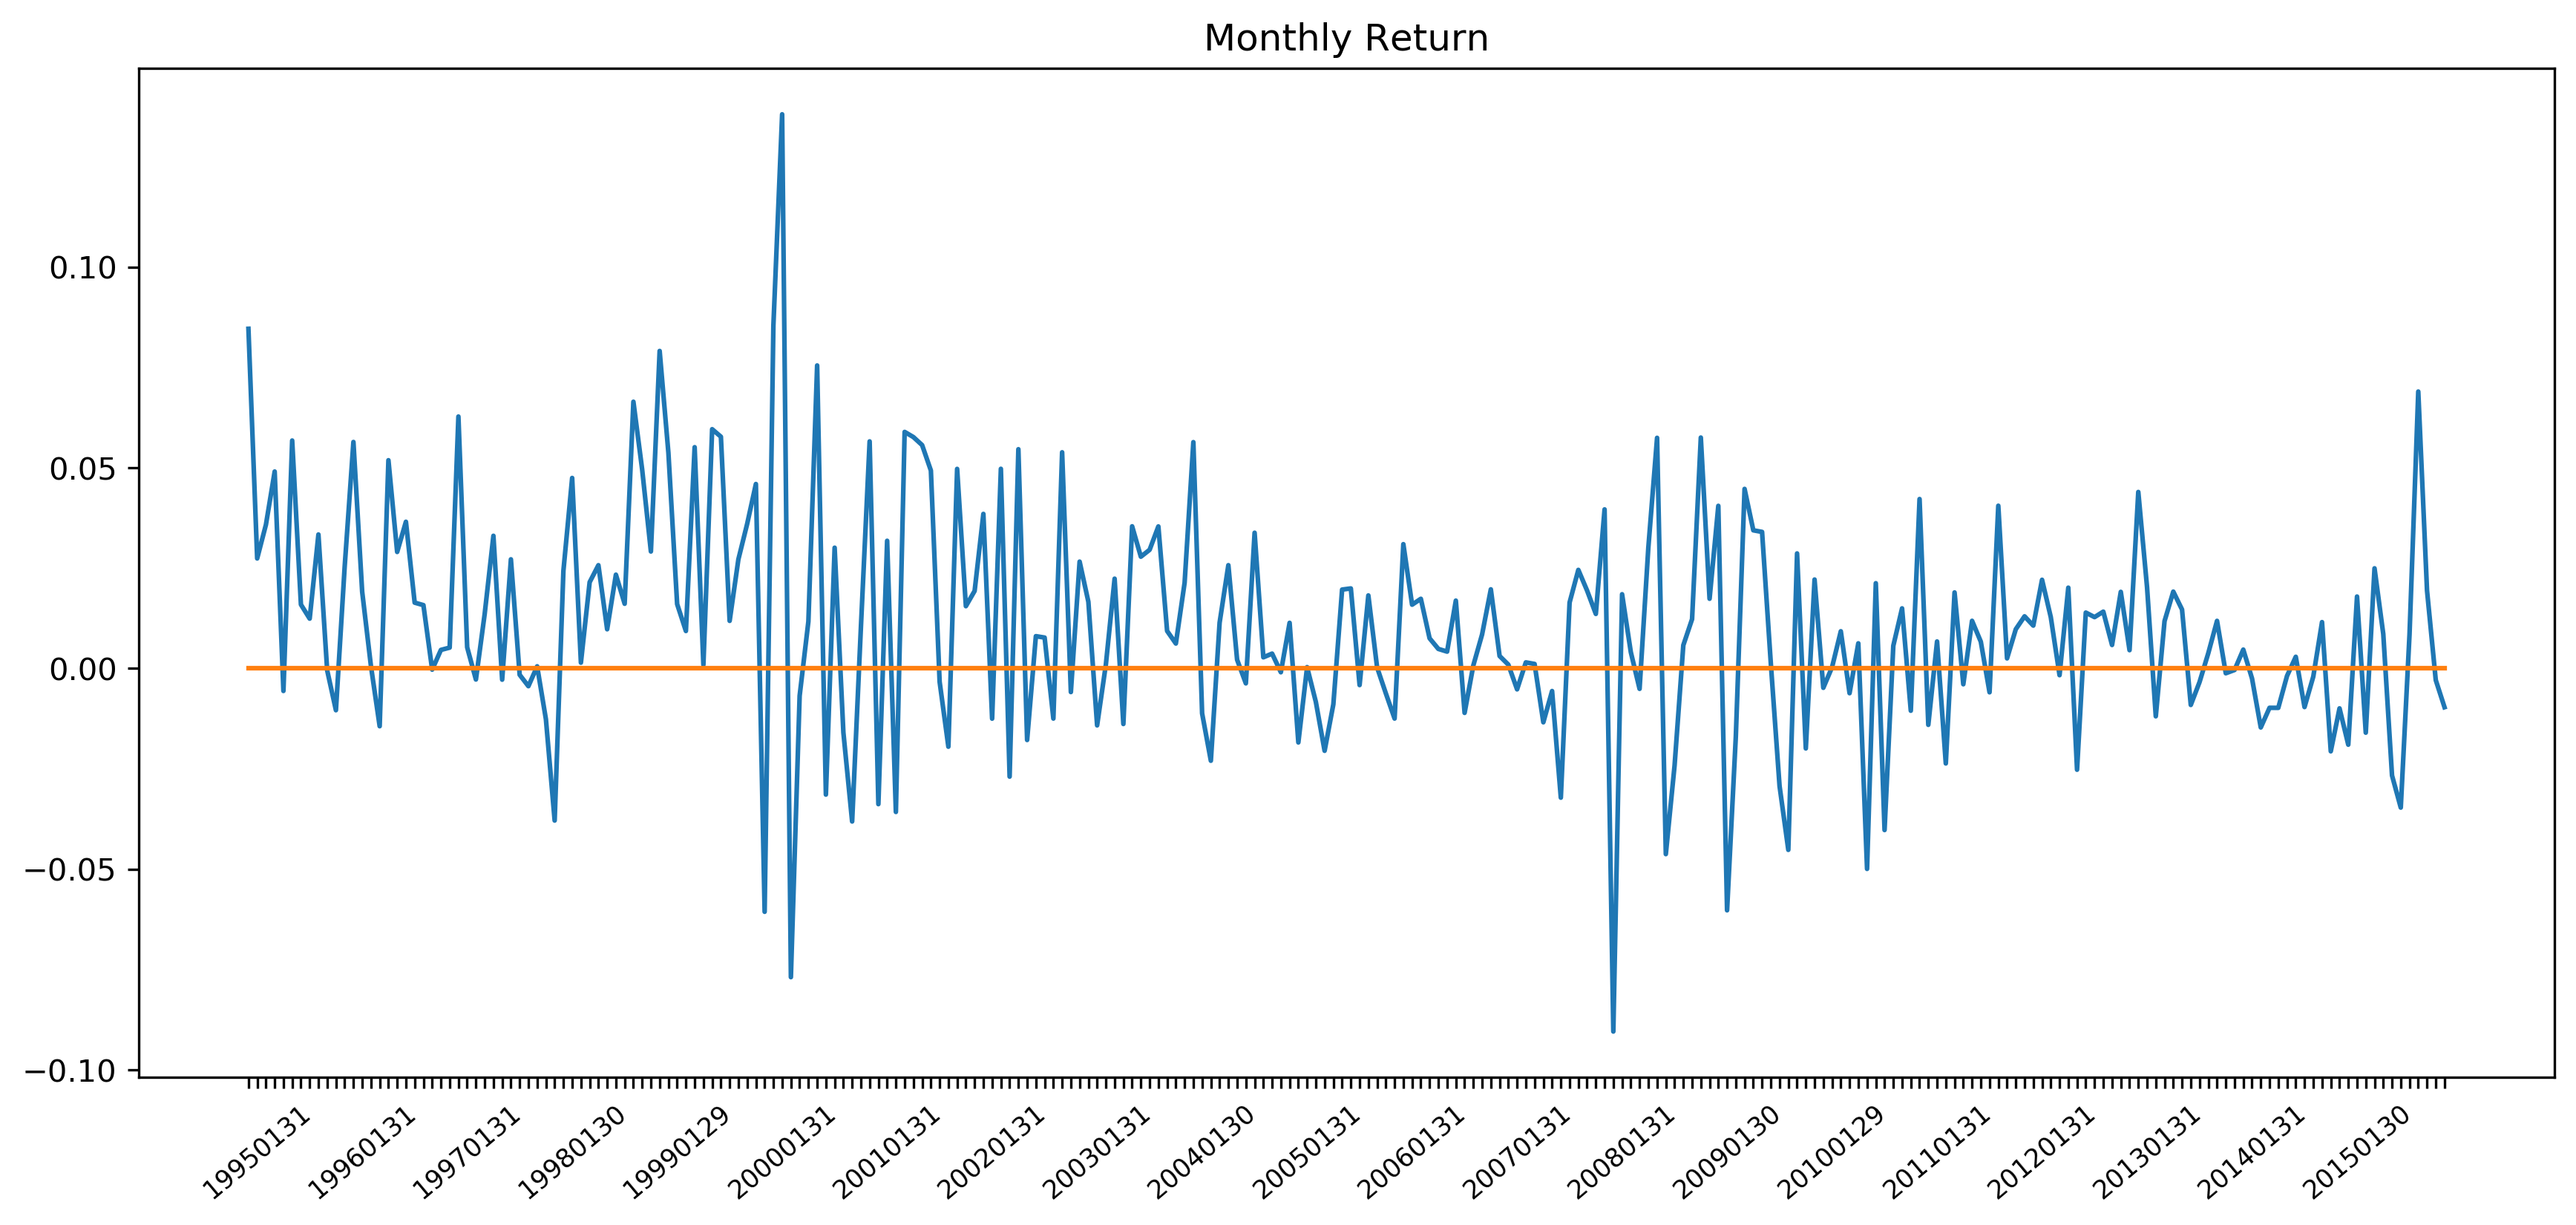

In [87]:
plt.plot(trend[0])
plt.plot([0]*252)
plt.xticks(range(len(scr)),scr,size='small',rotation=40)
plt.title('Monthly Return')
plt.show()

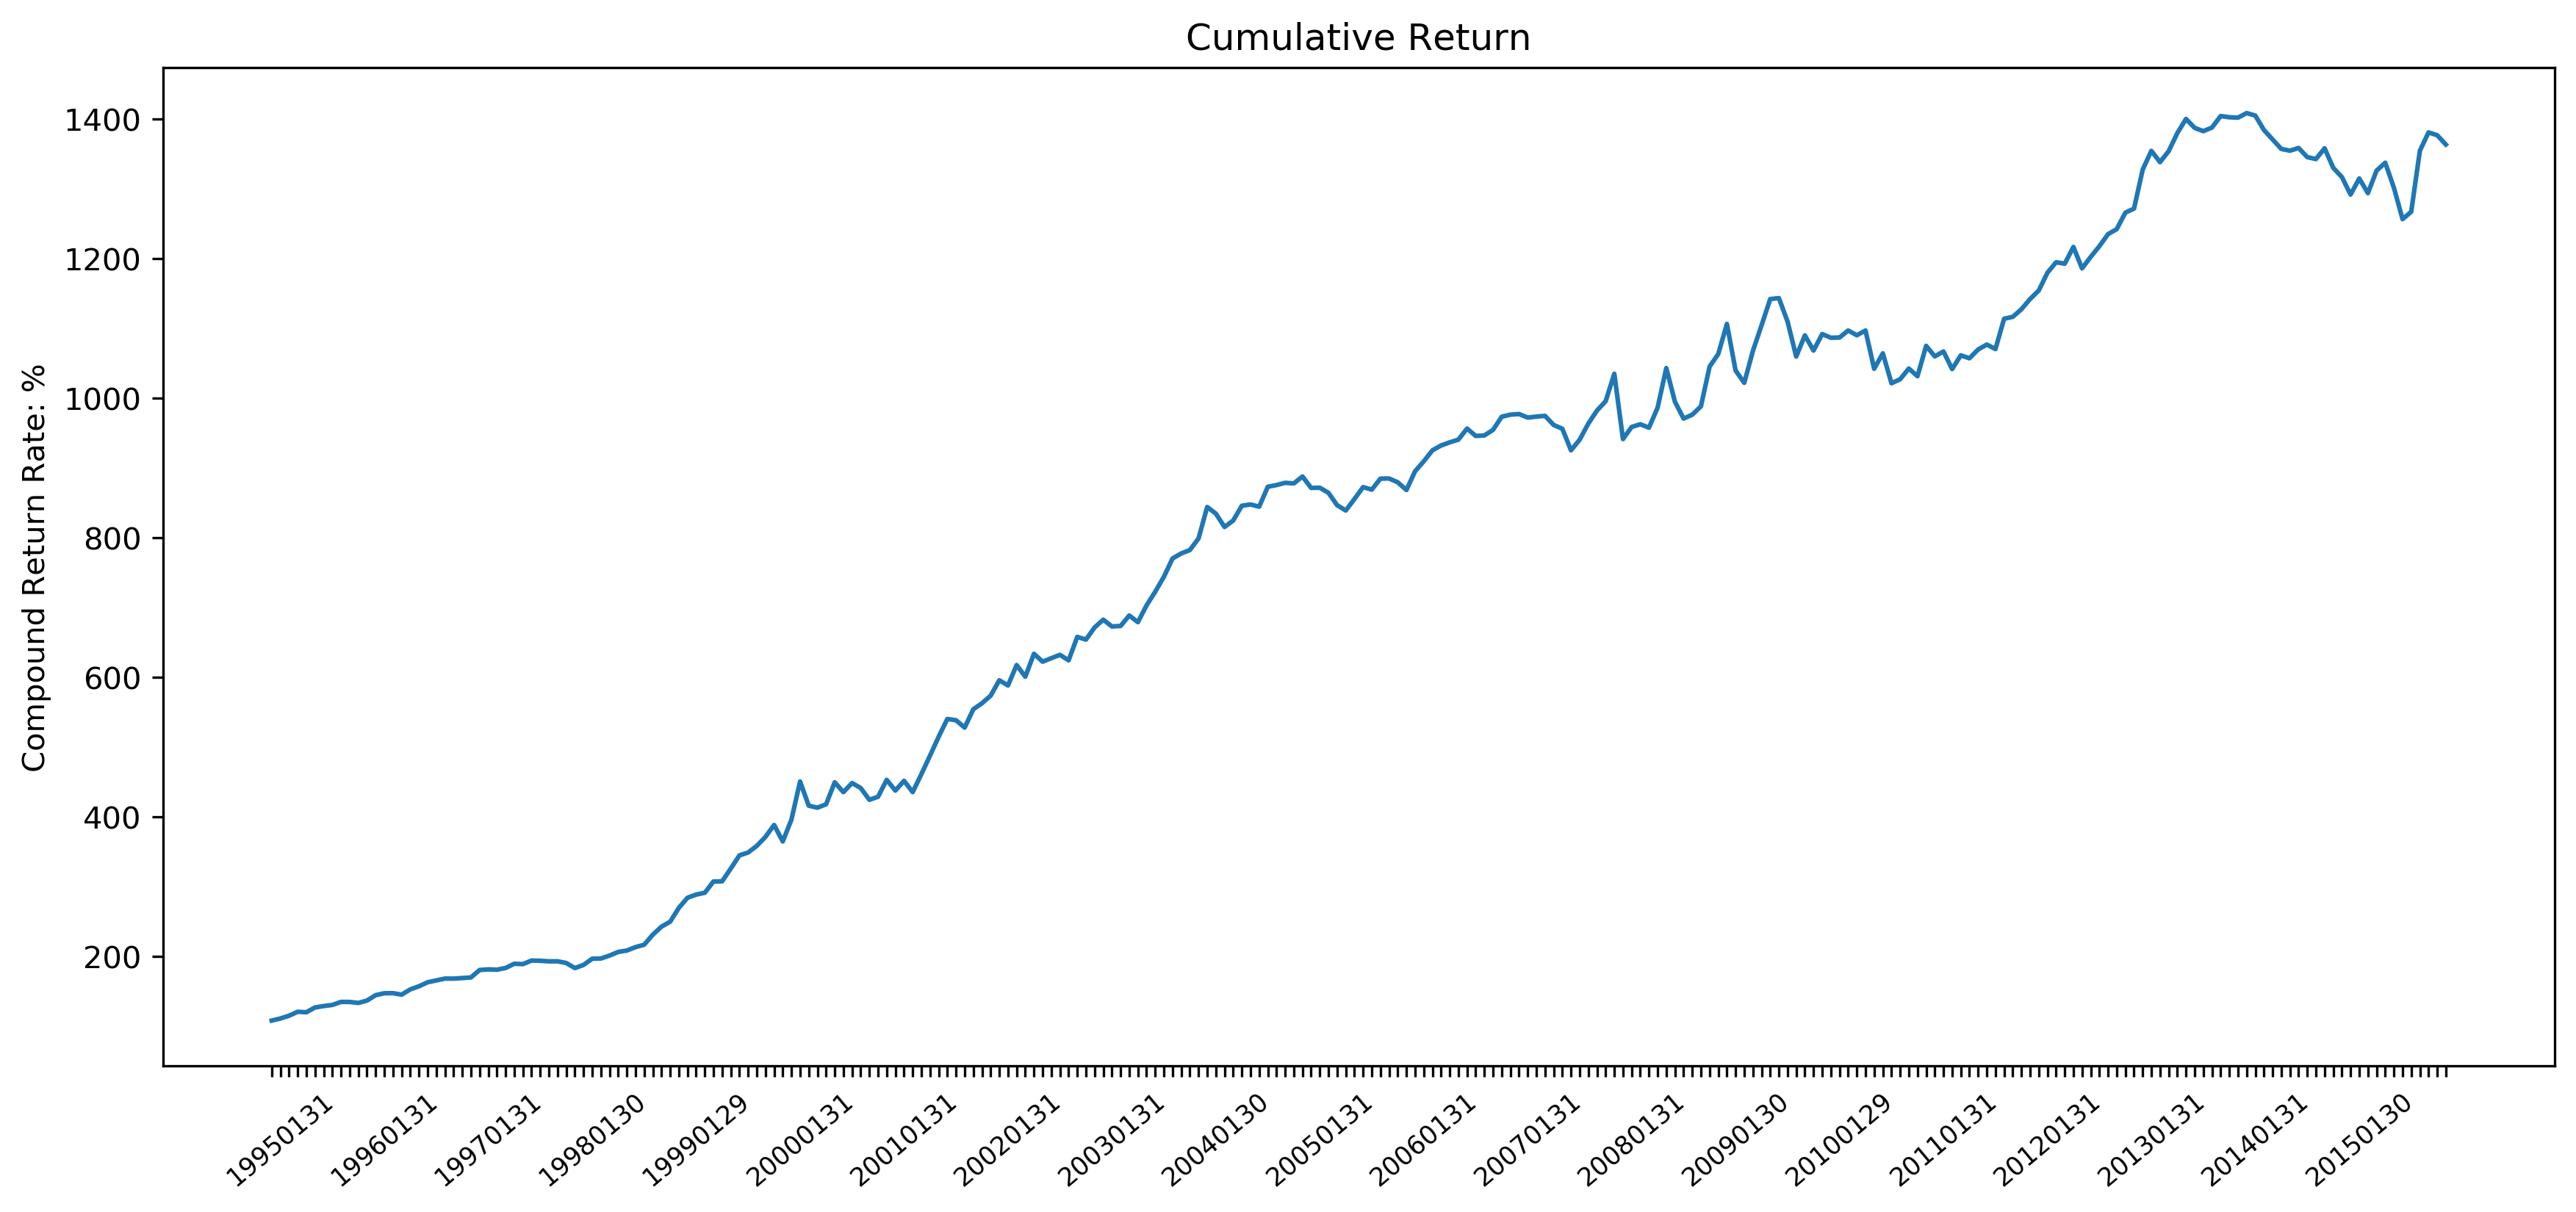

In [88]:
plt.plot(cumulative_return[0]*100)
plt.ylabel('Compound Return Rate: %')
plt.title('Cumulative Return')
plt.xticks(range(len(scr)),scr,size='small',rotation=40)
plt.show()

In [90]:
# Sharpe ratio for different groups, group 0 is our strategy
print('Sharpe ratio')
for i in range(num+1):
    print(i,(trend_rkf[i].mean()/trend_rkf[i].std())*12**0.5)

Sharpe ratio
0 1.0789098632231346
1 1.2237263445217124
2 0.9399430698301777
3 0.9023846411589505
4 0.8426960742547925
5 0.7908855699135869
6 0.762151455666962
7 0.5975117804004522
8 0.6893086342509119
9 0.5630221637413674
10 0.6039856483635448
11 0.550433963672667
12 0.5206865108701889
13 0.42779436548632227
14 0.449305302276639
15 0.42579716718748584
16 0.3371844212871257
17 0.3343598981848108
18 0.3991356402072171
19 0.24617909944659683
20 0.3375740314224567


In [95]:
est_period=12
trade_length=252
'''print('\nCAPM')
for i in range(num+1): #CAMP Model
    x = mrk.values[est_period:trade_length+est_period]
    x = sm.add_constant(x)
    OLS = (sm.OLS(trend[i], x)).fit()
    print(i,OLS.summary())'''
print('\nFama-French three factor model')
for i in range(num+1): #CAMP Model
    x = tf[['Mkt-RF','SMB','HML']][est_period:trade_length+est_period].values
    x = sm.add_constant(x)
    OLS = (sm.OLS(trend[i], x)).fit()
    print('Group',i,':\n',OLS.summary())


Fama-French three factor model
Group 0 :
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     8.078
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           3.72e-05
Time:                        17:19:45   Log-Likelihood:                 552.51
No. Observations:                 252   AIC:                            -1097.
Df Residuals:                     248   BIC:                            -1083.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [114]:
# To testify whether our strategy can be replicated by those three factors
# Run regressions between our strategy's rate of return and those three factors'
alpha=position(io=12,num=20,L=[3,5,10,20,50,100,200,400,600,800,1000])[0][0]
short=position(io=12,num=20,L=[3,5,10])[0][0]
momentum=position(io=12,num=20,L=[20,50,100])[0][0]
long=position(io=12,num=20,L=[200,400,600,800,1000])[0][0]
x=np.transpose(np.array([short,momentum,long]))
x = sm.add_constant(x)
OLS = (sm.OLS(alpha, x)).fit()
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     18.79
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           5.14e-11
Time:                        17:51:18   Log-Likelihood:                 566.57
No. Observations:                 252   AIC:                            -1125.
Df Residuals:                     248   BIC:                            -1111.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0065      0.002      3.695      0.0

In [117]:
# Compound annual rate of four factors
a=1
for i in [alpha,short,momentum,long]:
    a=1
    for j in range(252):
        a*=(1+i[j])
    print(a)

13.634752313671427
12.927157953268194
8.157394286832503
6.222949539385195


#### Five groups
* Below is our strategy's performance when we divide all stocks into 5 groups.<br>
* The performance is not good because of our shorting of last group.
Due to our data processing, actually remaining stocks are all well performing stocks.<br>
* Therefore, if we still divide them into 5 stocks, the last group will not behave badly as we expected. And to assure our strategy can identify the badly performing stocks, we choose 20 groups finally.

In [119]:
trend,trend_rkf,cumulative_return,mrk_return=position(io=12,num=5,L=[3,5,10,20,50,100,200,400,600,800,1000])

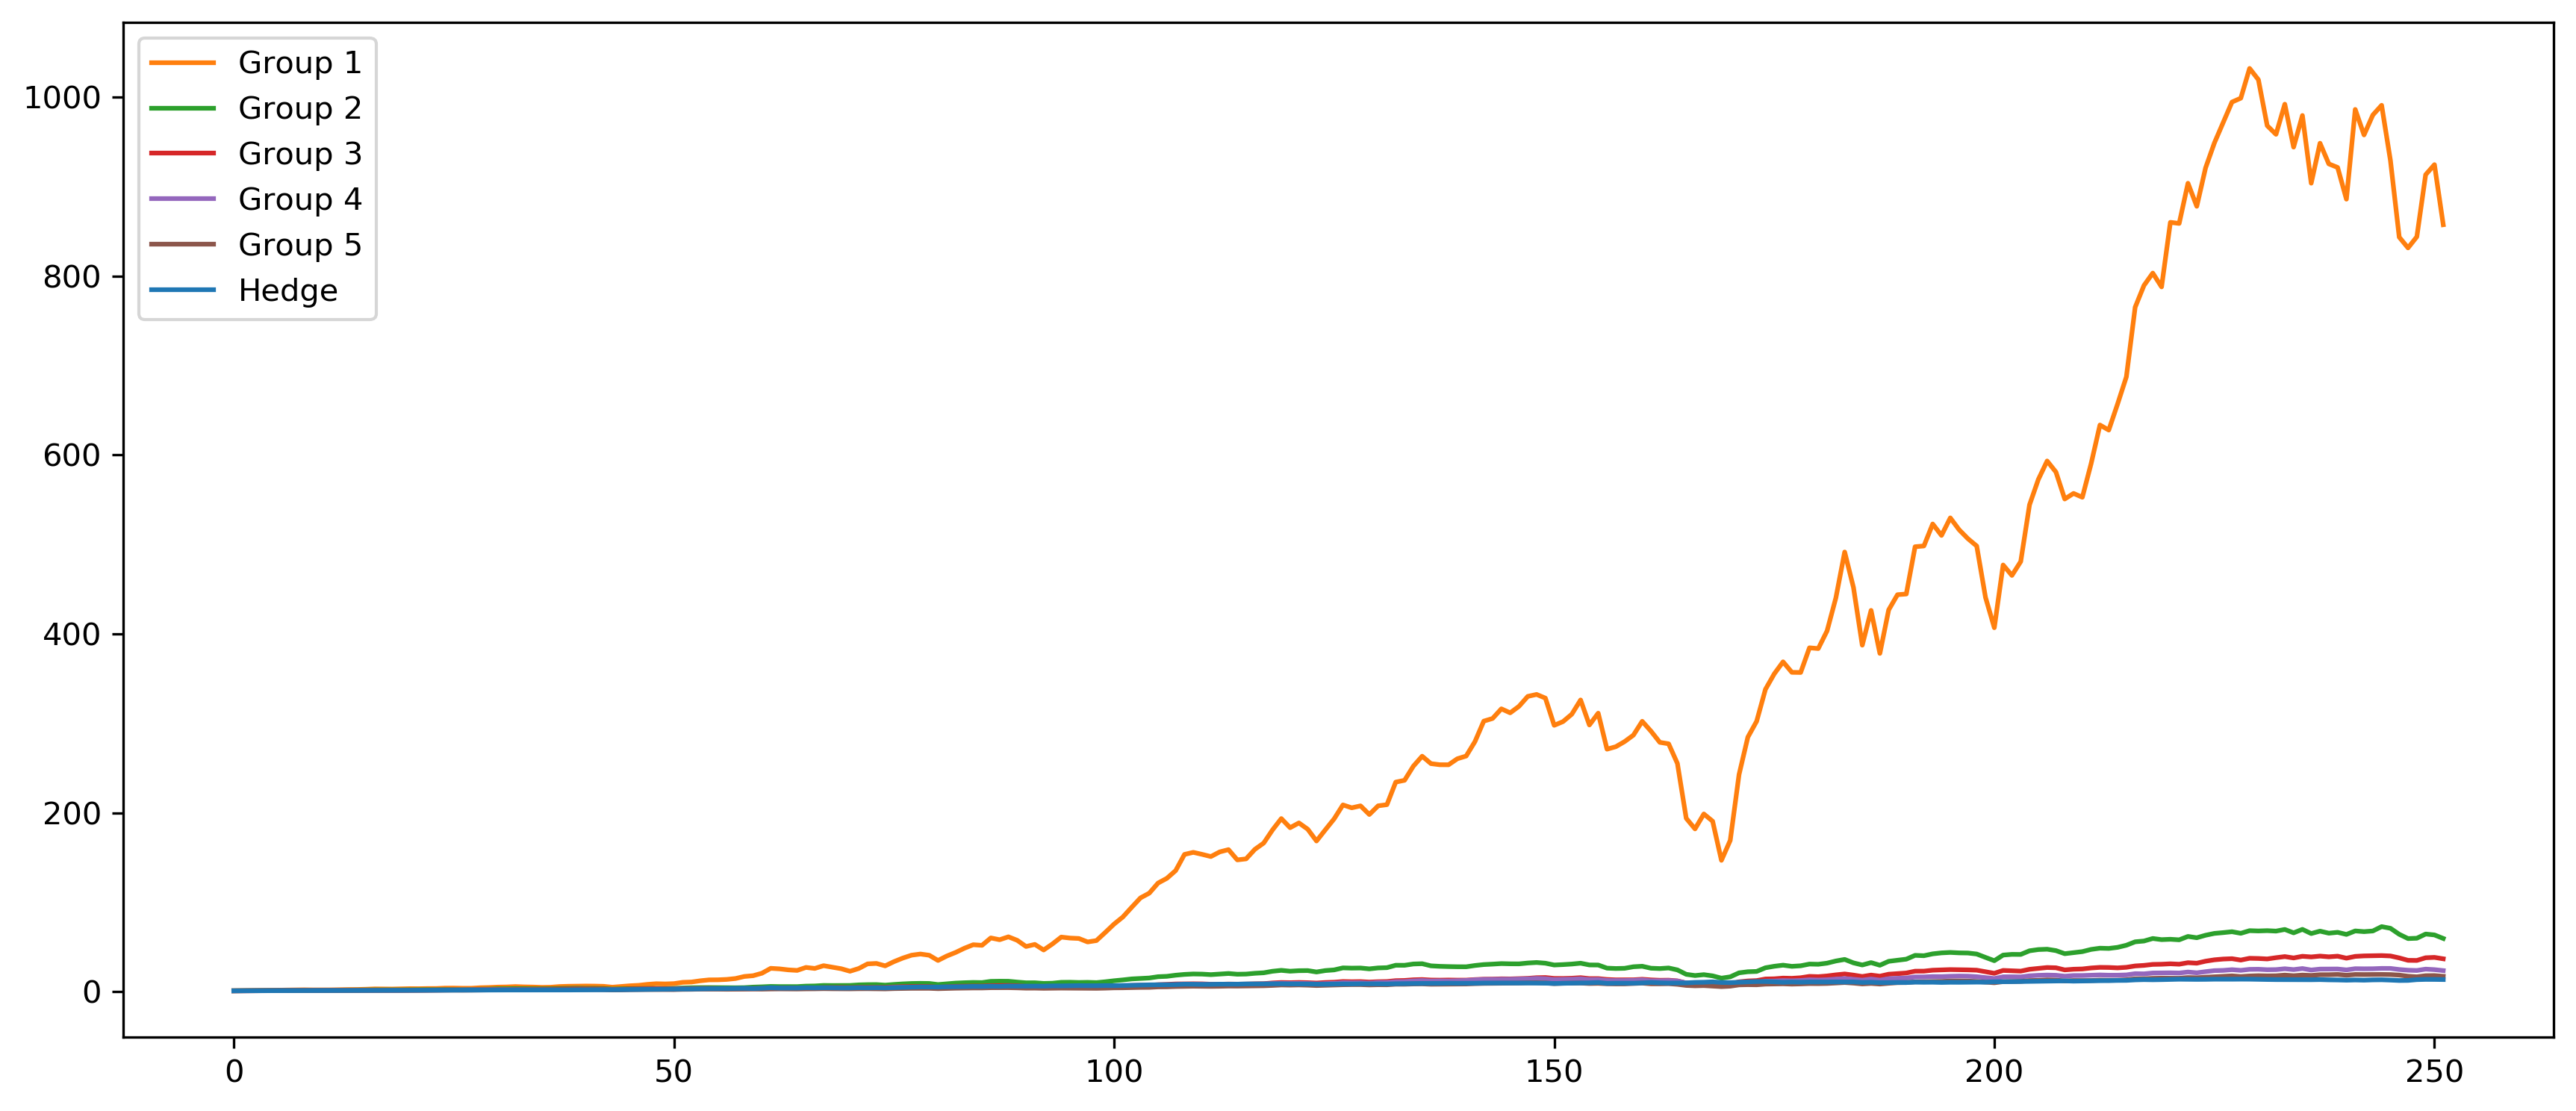

In [120]:
# Plot the cumulative return of the first 5 group and our strategy
for j in range(1,6):
    plt.plot(cumulative_return[j],color=('C'+str(j)),label=('Group '+str(j)))
plt.plot(cumulative_return[0],color=('C'+str(0)),label='Hedge')
plt.legend(loc='best')
plt.show()

Compound annual interest rate is: 13.248073174289798


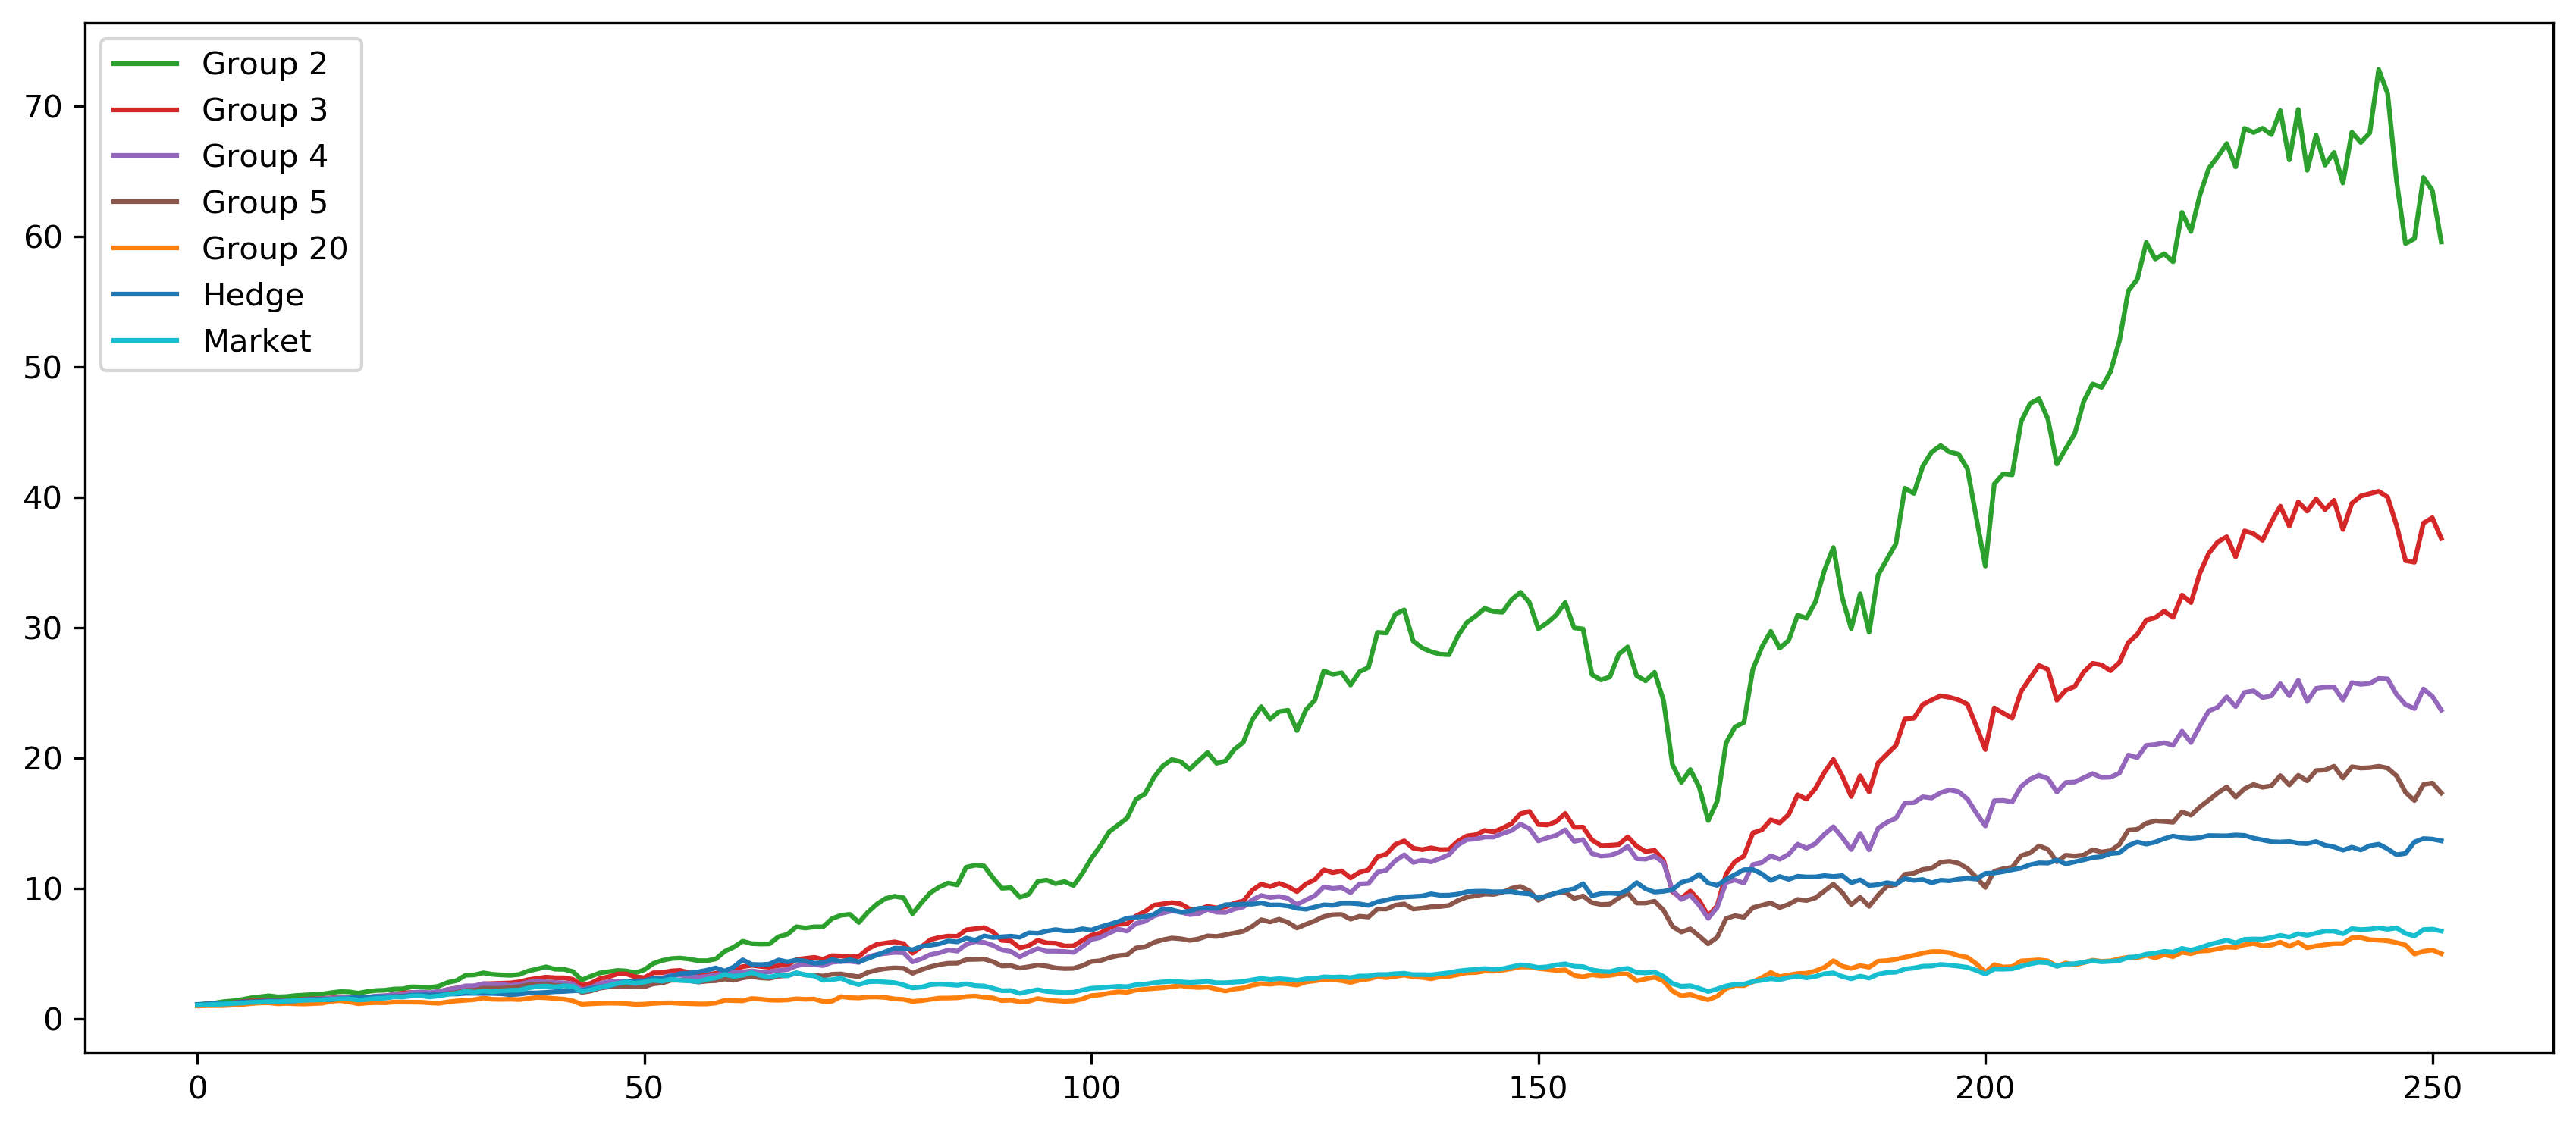

In [121]:
# Plot the cumulative return of the group 2-5, group 20 and our strategy
print('Compound annual interest rate is:',100*(cumulative_return[0][-1]**(1/252*12)-1))
for j in range(2,6):
    plt.plot(cumulative_return[j],color=('C'+str(j)),label=('Group '+str(j)))
plt.plot(cumulative_return[-1],color=('C'+str(1)),label=('Group '+str(20)))
plt.plot(cumulative_return[0],color=('C'+str(0)),label='Hedge')
plt.plot(mrk_return,label='Market',color='C9')
plt.legend(loc='best')
plt.show()

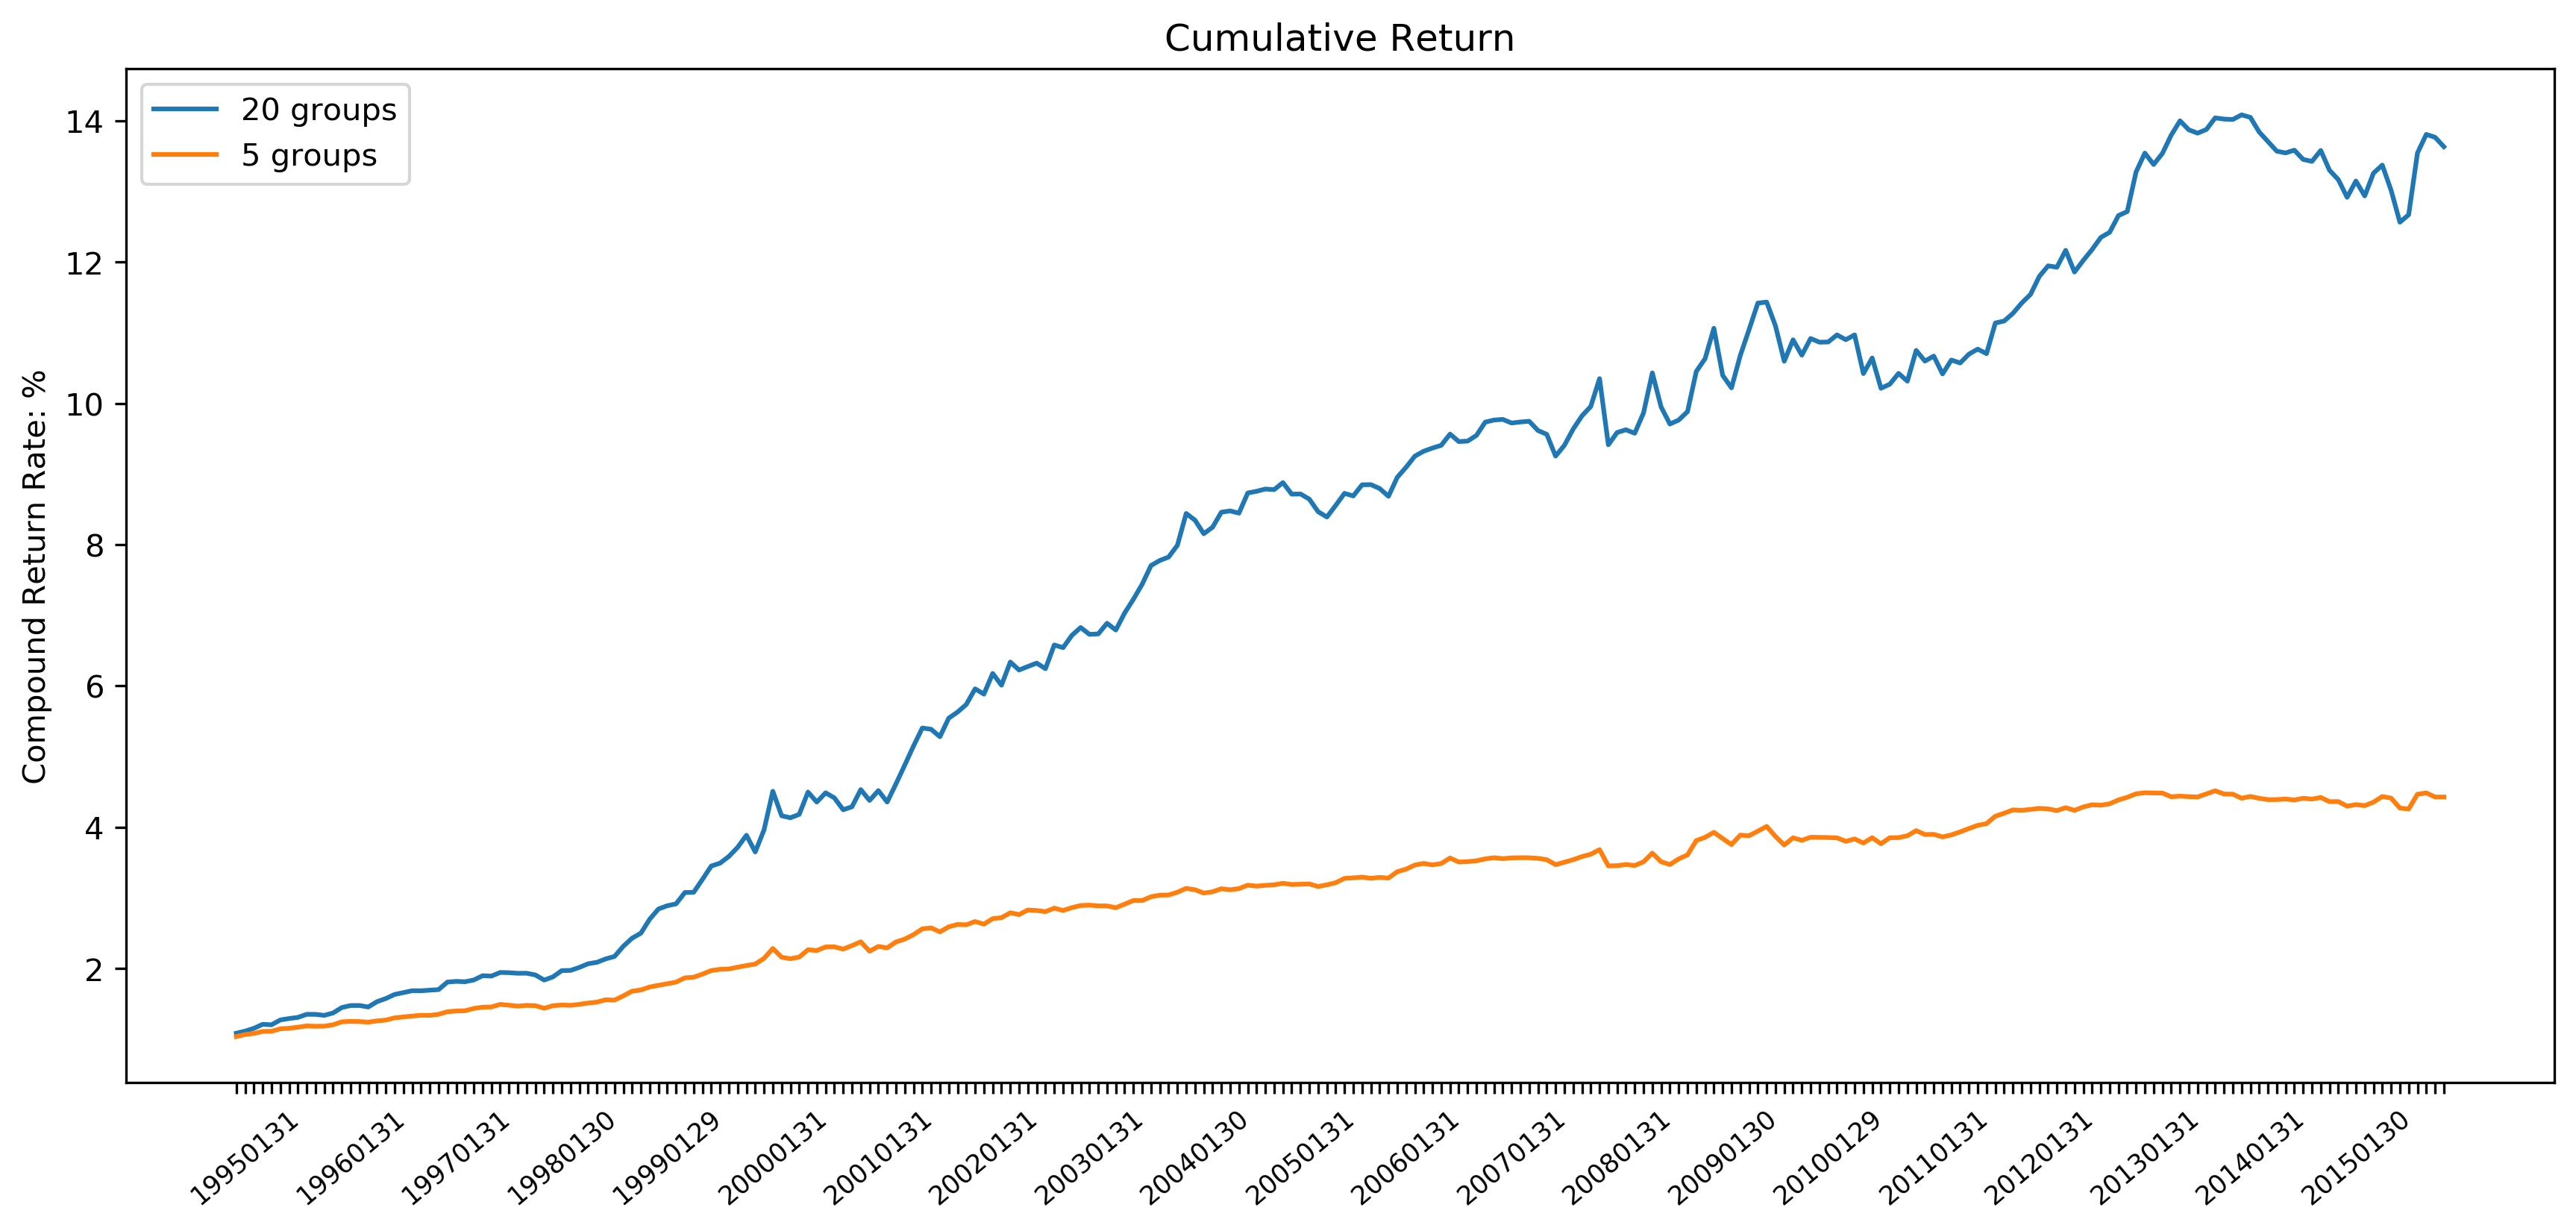

In [163]:
# 20 groups' cumulative rate of return is higher
l20=position(12,20)
l5=position(12,5)
plt.plot(l20[2][0],color='C0',label='20 groups')
plt.plot(l5[2][0],color='C1',label='5 groups')
plt.legend(loc='best')
plt.ylabel('Compound Return Rate: %')
plt.title('Cumulative Return')
plt.xticks(range(len(scr)),scr,size='small',rotation=40)
plt.show()

In [164]:
# Sharpe ratio for 20 groups is higher
print('Sharpe ratio')
print('5 groups')
for i in range(6):
    print(i,(l5[1][i].mean()/l5[1][i].std())*12**0.5)
print('20 groups')
for i in range(21):
    print(i,(l20[1][i].mean()/l20[1][i].std())*12**0.5)

Sharpe ratio
5 groups
0 0.8441082976129038
1 1.056881231780737
2 0.7252085036760335
3 0.5918376901058185
4 0.4235863199972869
5 0.32481381004072635
20 groups
0 1.0789098632231346
1 1.2237263445217124
2 0.9399430698301777
3 0.9023846411589505
4 0.8426960742547925
5 0.7908855699135869
6 0.762151455666962
7 0.5975117804004522
8 0.6893086342509119
9 0.5630221637413674
10 0.6039856483635448
11 0.550433963672667
12 0.5206865108701889
13 0.42779436548632227
14 0.449305302276639
15 0.42579716718748584
16 0.3371844212871257
17 0.3343598981848108
18 0.3991356402072171
19 0.24617909944659683
20 0.3375740314224567
